In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
import corner

import MCMC

%matplotlib nbagg
%matplotlib inline
np.random.seed(1)
plt.style.use('ggplot')

In [2]:
t = True
while t:
    try:
        x = np.log(-5)
    except :
        print("This is an error message!")
        t = False

/home/hope-moloko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


This is an error message!


## Problem 1

### Reading the data

In [2]:
Data = pd.read_csv('example_data.txt',delimiter=' ',names=['x','y','err'])
x_values = Data.x
y_values = Data.y
error = Data.err

### Define Model , Likelihood and Prior

In [3]:
def Model(a,b,c,x):
    y_i = a*x*np.sin(b*x+c)
    return y_i

def Likelihood(thetas):
    x = x_values
    y = y_values
    sigma = error
    a = thetas[0]
    b = thetas[1]
    c = thetas[2]
    mu = Model(a,b,c,x)
    term1 = np.log(2*np.pi*(sigma**2))
    term2 = ((y-mu)**2)/(2*sigma**2)
    
    return sum((term1-term2))

'''Using a Flat prior,hence not defined here'''

'Using a Flat prior,hence not defined here'

In [16]:
#Specifiy the inputs

theta = np.array([3,2,2])
stepsize = np.array([0.36,0.5,0.5])
Number_of_iter = 50000
inter = [(1,3),(0,1),(0,2)]



## Run MCMC

In [17]:
Sample , lik ,num = MCMC.metropolis_hasting(Likelihood,thetai=theta,N=Number_of_iter,sigma_theta=stepsize,Flat_prior=True,Flat_interval=inter)

## Posterior

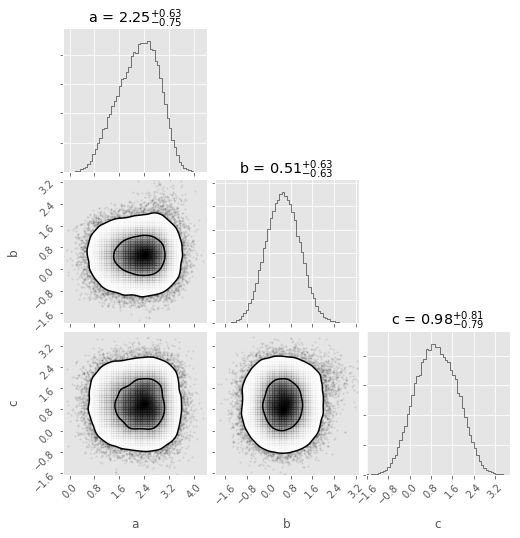

In [18]:
corner.corner(Sample,labels=['a','b','c'],show_titles=True,bins=60,levels=[0.5,0.95],smooth=1.5,max_n_ticks=7);

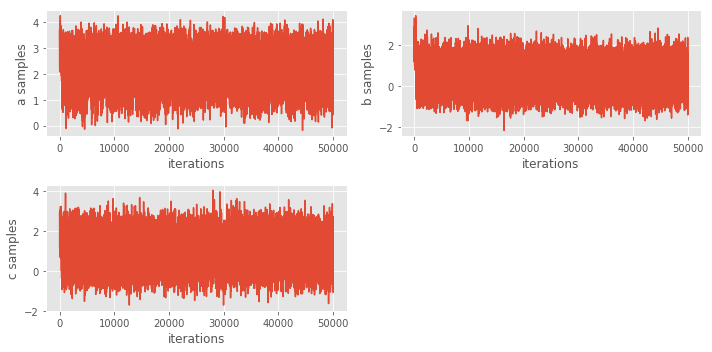

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(Sample[0:,0],)
plt.ylabel('a samples')
plt.xlabel('iterations')

plt.subplot(222)
plt.plot(Sample[0:,1],)
plt.ylabel('b samples')
plt.xlabel('iterations')

plt.subplot(223)
plt.plot(Sample[0:,2],)
plt.ylabel('c samples')
plt.xlabel('iterations')

plt.tight_layout()

## Model

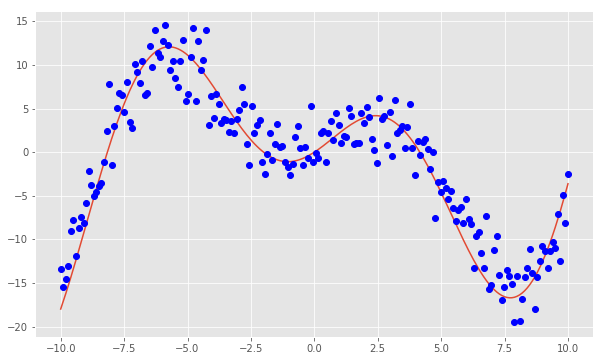

In [12]:
y_model = 2.23*x_values*np.sin(0.51*x_values + 1.02)

plt.figure(figsize=(10,6))
plt.plot(x_values,y_model)
plt.plot(x_values,y_values,'o',color='blue')

## Problem 2

## Reading the Data

In [11]:
Data1 = pd.read_csv('example_cubic_data.txt',delimiter=' ',names=['x1','y1','err1'])
x_values1 = Data1.x1
y_values1 = Data1.y1
error1 = Data1.err1

Text(0,0.5,'y')

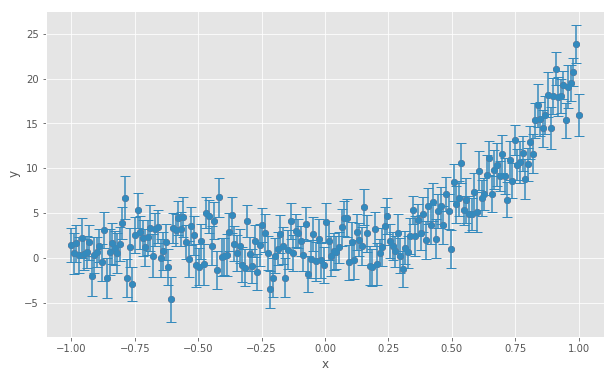

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_values1,y_values1,'o')
plt.errorbar(x_values1,y_values1,yerr=error1,fmt='o',capsize=5)
plt.xlabel('x')
plt.ylabel('y')

### Define model and Likelihood

In [13]:
def Model_1(a,b,c,d,x):
    y_ii = a*x**3 + b*x**2 + c*x + d
    return y_ii

def Likelihood_1(thetas):
    x = x_values1
    y = y_values1
    sigma = error1
    a = thetas[0]
    b = thetas[1]
    c = thetas[2]
    d = thetas[3]
    
    mu = Model_1(a,b,c,d,x)
    term1 = np.log(2*np.pi*(sigma**2))
    term2 = ((y-mu)**2)/(2*sigma**2)
    
    return sum((term1-term2))

In [21]:
#Specifiy the inputs

theta1 = np.array([9,1,0.5,2])
stepsize1 = np.array([1.8,1.5,1.5,1.8])
Number_of_iter1 = 50000
inter1 = [(-20,20),(-20,20),(-20,20),(-20,20)]

## Run MCMC

In [22]:
Sample1 ,lik1 ,num1 = MCMC.metropolis_hasting(Likelihood=Likelihood_1,thetai=theta1,N=Number_of_iter1,sigma_theta=stepsize1,Flat_prior=True,Flat_interval=inter1)

## Run MCMC with multiple starting points

In [16]:
thetass = [np.array([9,1,0.5,2]),np.array([25,4,5,2]),np.array([-10,8,2,7])]
Sample1_mult = []
lik_mult = []
num_mult = []

for it in range(len(thetass)):
    S,l,n = MCMC.metropolis_hasting(Likelihood=Likelihood_1,thetai=thetass[it],N=Number_of_iter1,sigma_theta=stepsize1,Flat_prior=True,Flat_interval=inter1)
    
    Sample1_mult.append(S)
    lik_mult.append(l)
    num_mult.append(n)

In [17]:
S1 = Sample1_mult[0]
S2 = Sample1_mult[1]
S3 = Sample1_mult[2]

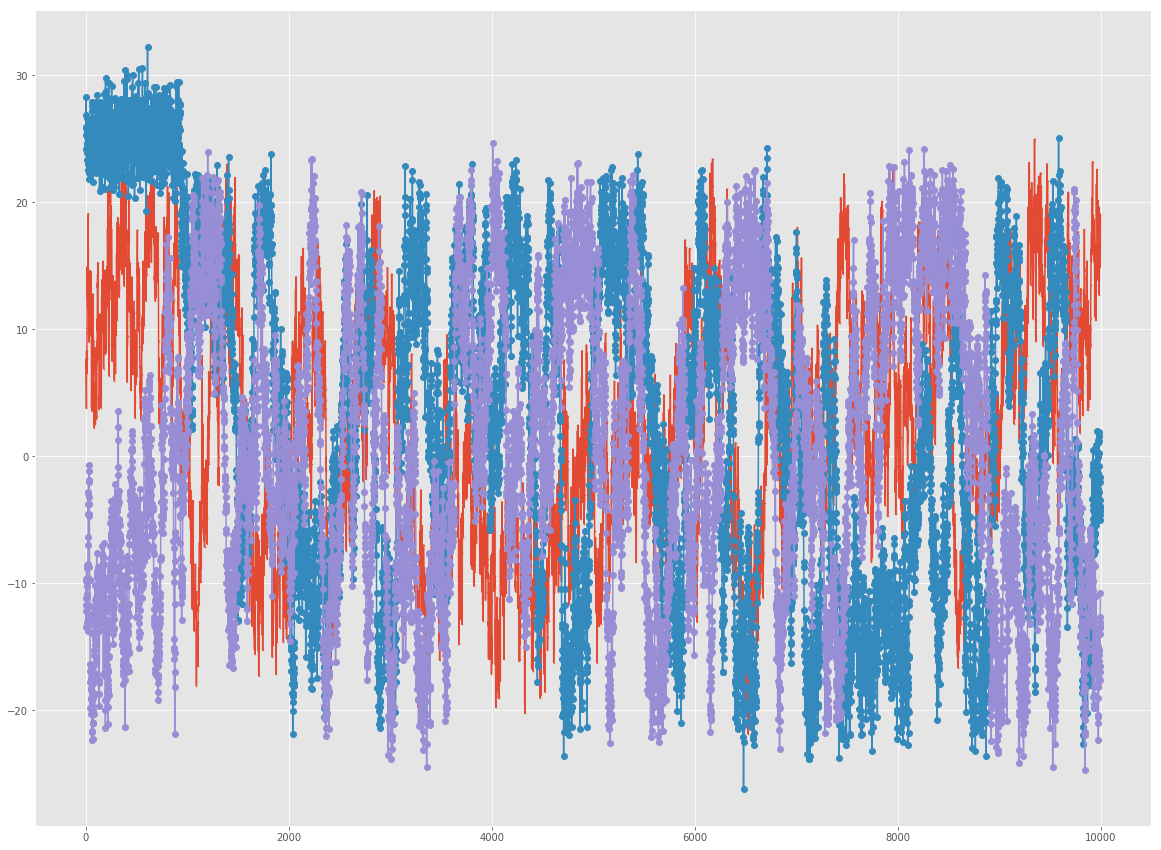

In [18]:
plt.figure(figsize=(20,15))
plt.plot(S1[0:,0],'o-',markersize=0.5)
plt.plot(S2[0:,0],'o-',markersize=6)
plt.plot(S3[0:,0],'o-',markersize=6)

In [ ]:
#whos

## Posterior

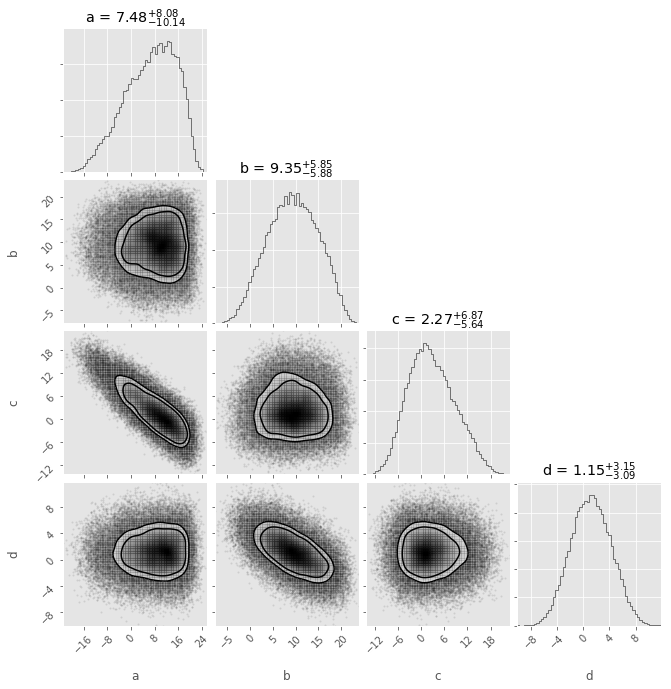

In [23]:
corner.corner(Sample1,labels=['a','b','c','d'],show_titles=True,bins=60,levels=[0.5,0.65],smooth=1.7,max_n_ticks=7);

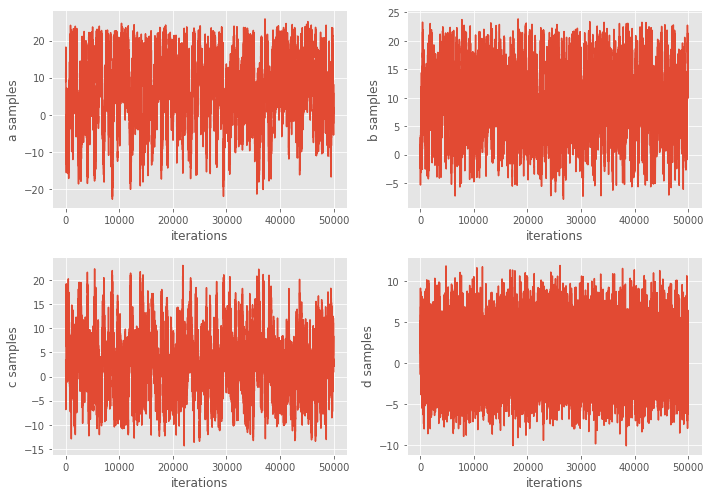

In [24]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(Sample1[0:,0],)
plt.ylabel('a samples')
plt.xlabel('iterations')

plt.subplot(222)
plt.plot(Sample1[0:,1],)
plt.ylabel('b samples')
plt.xlabel('iterations')

plt.subplot(223)
plt.plot(Sample1[0:,2],)
plt.ylabel('c samples')
plt.xlabel('iterations')

plt.subplot(224)
plt.plot(Sample1[0:,3],)
plt.ylabel('d samples')
plt.xlabel('iterations')

plt.tight_layout()

## Model_1

Text(0,0.5,'y')

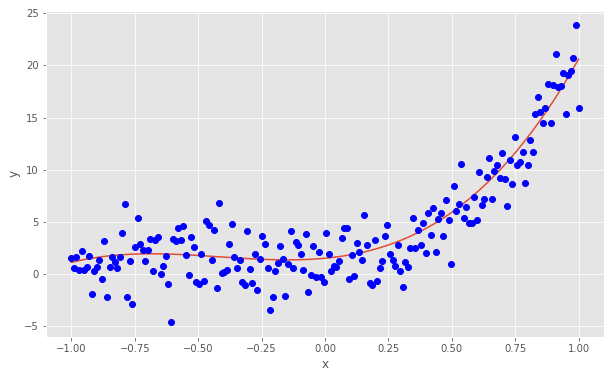

In [25]:
y_model1 = Model_1(7.48,9.35,2.27,1.5,x_values1)

plt.figure(figsize=(10,6))
plt.plot(x_values1,y_model1)
plt.plot(x_values1,y_values1,'o',color='blue')
plt.xlabel('x')
plt.ylabel('y')

#### The model can be improved by changing around the  stepsize 